In [2]:
import numpy as np
import pandas as pd 
import os
import sklearn
import nltk

# Data Preprocessing

In [ ]:
# чистка выбросов

import pandas as pd

# Example DataFrame
df = pd.DataFrame({'value': [12, 15, 14, 10, 102, 13, 11, 14, 13, 15, 110]})
# Compute IQR boundaries
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers outside the IQR bounds
df_clean = df[~((df['value'] < lower_bound) | (df['value'] > upper_bound))]
print(df_clean)


#resampling
from imblearn.over_sampling import SMOTE

X_train, y_train = ...  # your feature matrix and labels for training
print("Class distribution before:", dict(pd.Series(y_train).value_counts()))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print("Class distribution after:", dict(pd.Series(y_res).value_counts()))


# NLP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)

ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(xtrain) + list(xvalid))
xtrain_ctv =  ctv.transform(xtrain) 
xvalid_ctv = ctv.transform(xvalid)


# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xvalid_svd = svd.transform(xvalid_tfv)


import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]



In [1]:
from gensim.models import Word2Vec

sentences = [["i", "like", "nlp"], ["word", "embeddings", "are", "cool"]]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)
vector = model.wv['nlp']
print(vector[:5])  # пример вектора


[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193 ]


In [ ]:
import numpy as np

def load_glove(file_path):
    embeddings = {}
    with open(file_path, encoding="utf8") as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype="float32")
            embeddings[word] = vector
    return embeddings

glove = load_glove("glove.6B.100d.txt")
print(glove["king"][:5])


In [ ]:
from gensim.models import FastText

sentences = [["i", "like", "natural", "language", "processing"]]
model = FastText(sentences, vector_size=100, window=3, min_count=1)
print(model.wv["language"][:5])

#или

import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # скачивает модель

ft = fasttext.load_model('cc.en.300.bin')
print(ft.get_word_vector("hello")[:5])


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def nltk_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]


In [ ]:
# GRU with glove embeddings and two dense layers
from keras.layers import Dense, GRU, Dropout, Activation, Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.model import Sequential

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

In [ ]:
# размер вокаба

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index) + 1

In [2]:
#полный пайплайн

import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer_en = WordNetLemmatizer()

stop_words_en = set(stopwords.words('english'))

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text) #числа
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^a-z]', ' ', text)
    
    tokens = word_tokenize(text, language='english')
    
    tokens = [word for word in tokens if word not in stop_words_en and len(word) > 2]
    pos_tags = nltk.pos_tag(tokens)
    tokens = [lemmatizer_en.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    return tokens



[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


# Ensembling

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = svm.SVC(probability=True)

ensemble = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

NameError: name 'svm' is not defined

# Time Series

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

df = pd.read_csv("your_timeseries.csv", parse_dates=['date'], index_col='date')

def create_lag_features(data, lags=5):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    df.dropna(inplace=True)
    return df

df_lagged = create_lag_features(df, lags=5)

X = df_lagged.drop(columns=['value'])
y = df_lagged['value']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(pipeline, X, y, cv=tscv, scoring='neg_mean_squared_error')

print("Средняя MSE по кросс-валидации:", -scores.mean())


FileNotFoundError: [Errno 2] No such file or directory: 'your_timeseries.csv'

In [6]:
pip install torch pytorch-lightning keras prophet statsmodels pandas numpy matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

def generate_series(n=100):
    np.random.seed(42)
    time = np.arange(n)
    values = np.sin(0.2 * time) + np.random.normal(0, 0.1, n)
    return pd.DataFrame({"ds": pd.date_range("2020-01-01", periods=n, freq="D"),
                         "y": values})

df = generate_series()
train = df[:-20]
test = df[-20:]


In [7]:
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, Baseline, Trainer
from pytorch_lightning import seed_everything
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.metrics import SMAPE

# Преобразуем дату в числовой индекс
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['series_id', 'date'])
df['time_idx'] = df.groupby('series_id').cumcount()

# Обязательно:
# - 'series_id' → group_ids
# - 'time_idx' → числовой индекс
# - 'value' → target

from pytorch_forecasting import TimeSeriesDataSet

ts_dataset = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="value",
    group_ids=["series_id"],
    max_encoder_length=30,
    max_prediction_length=10,
    time_varying_unknown_reals=["value", "feature1", "feature2"],
    time_varying_known_reals=[],  # сюда можно добавить future features (календари и т.п.)
)


train_dataloader = dataset.to_dataloader(train=True, batch_size=16)

tft = TemporalFusionTransformer.from_dataset(dataset, learning_rate=0.03, hidden_size=16, loss=SMAPE())

trainer = Trainer(max_epochs=5, gradient_clip_val=0.1)
trainer.fit(tft, train_dataloaders=train_dataloader)


ModuleNotFoundError: No module named 'pytorch_forecasting'

In [ ]:
from pytorch_forecasting.models.nbeats import NBeats

nbeats = NBeats.from_dataset(dataset, learning_rate=0.03, loss=SMAPE())

trainer = Trainer(max_epochs=5)
trainer.fit(nbeats, train_dataloaders=train_dataloader)


In [ ]:
from pytorch_forecasting.models import DeepAR

deepar = DeepAR.from_dataset(dataset, learning_rate=0.03, hidden_size=20, loss=SMAPE())
trainer.fit(deepar, train_dataloaders=train_dataloader)


In [ ]:
from prophet import Prophet

df = pd.DataFrame({
    'ds': pd.date_range("2020-01-01", periods=100, freq="D"),
    'y': np.random.randn(100)
})

df_prophet = df[df['series_id'] == 'A'][['date', 'value']].rename(columns={'date': 'ds', 'value': 'y'})

model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

forecast[['ds', 'yhat']].tail(20).plot(x='ds', y='yhat', title="Prophet Forecast")


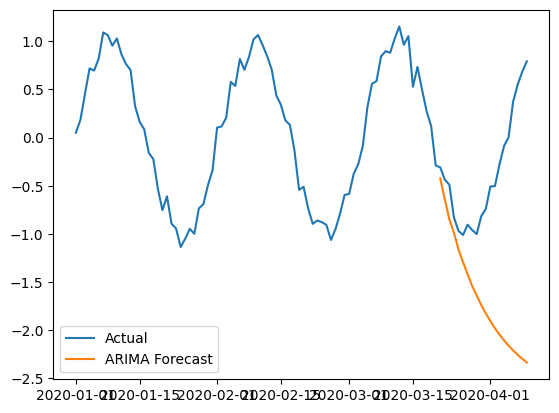

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

import pandas as pd
series = pd.Series([100, 110, 125], index=pd.date_range("2020-01-01", periods=3, freq="M"))

# Фильтруем одну серию
series_a = df[df['series_id'] == 'A'].copy()
series_a.set_index('date', inplace=True)
series_a = series_a['value'].asfreq('D')  # или 'M', 'H' в зависимости от частоты

# Теперь series_a — готовая Series для ARIMA

model = ARIMA(train['y'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=20)

plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(test['ds'], forecast, label='ARIMA Forecast')
plt.legend()
plt.show()
'''Сводка:
p — сколько предыдущих значений использовать (влияние истории).

d — сколько раз вычесть предыдущие значения, чтобы убрать тренд.

q — сколько предыдущих ошибок прогноза учитывать.

Практическое значение:
Сценарий	Параметры
Есть тренд (линейный рост/падение)	d=1
Зависит от одного или нескольких прошлых значений	p=1, p=2 и т.д.
Есть "скачки" и шум, зависящий от ошибок прогноза	q=1, q=2 и т.д.
'''

In [ ]:
def prepare_for_model(df, model_type):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['series_id', 'date'])

    if model_type == 'arima':
        return df[df['series_id'] == 'A'].set_index('date')['value'].asfreq('D')

    elif model_type == 'prophet':
        return df[df['series_id'] == 'A'][['date', 'value']].rename(columns={'date': 'ds', 'value': 'y'})

    elif model_type in ['tft', 'deepar', 'nbeats']:
        df['time_idx'] = df.groupby('series_id').cumcount()
        return df  # затем используешь в TimeSeriesDataSet

    elif model_type == 'informer':
        df['time_idx'] = df.groupby('series_id').cumcount()
        pivot = df.pivot(index='series_id', columns='time_idx', values='value')
        return torch.tensor(pivot.fillna(0).values).float()

    else:
        raise ValueError("Unknown model type")


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
import torch
from torch.utils.data import DataLoader

# Пример данных (замените на свои реальные данные)
data = pd.DataFrame({
    'time_idx': range(100),
    'value': [x + (x**2)*0.1 + 10*torch.sin(torch.tensor(x)/10) for x in range(100)],
    'series_id': [0] * 100
})

# Разделение данных на обучающую и тестовую выборки
train_data = data[:80]
test_data = data[80:]

# -------------------- ARIMA --------------------
# 1. Обучение модели ARIMA
# Определение порядка модели (p, d, q) - подберите значения на основе ACF и PACF
order = (5, 1, 0)
arima_model = ARIMA(train_data['value'], order=order)
arima_fit = arima_model.fit()

# 2. Прогнозирование с помощью ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_data))

# -------------------- TFT --------------------
# Подготовка данных для TFT
max_encoder_length = 20
max_prediction_length = len(test_data)

training = TimeSeriesDataSet(
    train_data,
    time_idx="time_idx",
    target="value",
    group_ids=["series_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["value"],
    static_categoricals=["series_id"],
    scalers={"value": GroupNormalizer(groups=["series_id"])},
)

validation = TimeSeriesDataSet(
    test_data,
    time_idx="time_idx",
    target="value",
    group_ids=["series_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["value"],
    static_categoricals=["series_id"],
    scalers={"value": training.scalers["value"]},
)

train_dataloader = DataLoader(training, batch_size=64, shuffle=True)
val_dataloader = DataLoader(validation, batch_size=64)

# Обучение модели TFT
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_quantiles=[0.5],
)

trainer = pl.Trainer(max_epochs=10, accelerator="cpu") # Используйте 'gpu' если доступно
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Прогнозирование с помощью TFT
best_tft = trainer.best_model
predictions = best_tft.predict(val_dataloader)
tft_forecast = best_tft.transform_output(predictions, group_ids=validation.get_group_ids())

# Визуализация результатов (опционально)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['time_idx'], data['value'], label='Actual')
plt.plot(test_data['time_idx'], arima_forecast, label='ARIMA Forecast')
plt.plot(test_data['time_idx'][-len(tft_forecast):], tft_forecast[:, 0], label='TFT Forecast')
plt.legend()
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('ARIMA vs TFT Forecasting')
plt.show()

In [ ]:
'''Пояснения к коду:

ARIMA:

Импорт: Импортируется класс ARIMA из библиотеки statsmodels.
Данные: Используется простой DataFrame с временным индексом (time_idx) и целевым значением (value).
Разделение данных: Данные разделяются на обучающую (train_data) и тестовую (test_data) выборки.
Обучение модели:
Создается экземпляр модели ARIMA с указанием обучающих данных и порядка модели (p, d, q).
p: Количество авторегрессионных членов (зависимость от прошлых значений).
d: Количество разностей, необходимых для достижения стационарности ряда.
q: Количество скользящих средних членов (зависимость от прошлых ошибок прогнозирования).
Порядок модели является критическим и обычно определяется с помощью анализа графиков автокорреляционной функции (ACF) и частной автокорреляционной функции (PACF) временного ряда.
Модель обучается с помощью метода fit().
Прогнозирование:
Метод forecast(steps=...) используется для получения прогноза на указанное количество шагов вперед (длина тестовой выборки).
TFT:

Импорт: Импортируются необходимые классы из библиотеки pytorch_forecasting.
Подготовка данных:
TimeSeriesDataSet используется для создания набора данных, понятного для TFT.
time_idx: Имя столбца, представляющего временной индекс.
target: Имя столбца с целевой переменной.
group_ids: Список столбцов, идентифицирующих уникальные временные ряды (в данном случае у нас один ряд, поэтому ['series_id']).
min_encoder_length, max_encoder_length: Минимальная и максимальная длина последовательности, используемой для кодирования прошлого.
max_prediction_length: Длина горизонта прогнозирования.
time_varying_known_reals: Список столбцов с вещественными значениями, известными в будущем (здесь мы используем time_idx в качестве примера, хотя это может быть не всегда полезно).
time_varying_unknown_reals: Список столбцов с вещественными значениями, которые мы хотим предсказать ('value').
static_categoricals: Список столбцов с категориальными признаками, которые не меняются во времени (['series_id']).
scalers: Словарь для масштабирования числовых признаков. GroupNormalizer нормализует целевую переменную по группам (здесь по series_id).
DataLoader: Создаются DataLoader'ы для обучающей и валидационной (тестовой) выборок.
Обучение модели:
TemporalFusionTransformer.from_dataset() создает модель TFT на основе конфигурации набора данных. Вы можете настроить различные гиперпараметры, такие как learning_rate, hidden_size, attention_head_size и другие.
pl.Trainer (из PyTorch Lightning) используется для упрощения процесса обучения. Указывается максимальное количество эпох (max_epochs) и устройство (accelerator).
Модель обучается с помощью метода trainer.fit().
Прогнозирование:
Лучшая обученная модель загружается из trainer.best_model.
best_tft.predict() используется для получения прогнозов на основе валидационного DataLoader.
best_tft.transform_output() преобразует выходные данные модели обратно к исходному масштабу.
Важные моменты:

Замена данных: Обязательно замените пример data на свои фактические временные ряды.
Порядок ARIMA: Правильный выбор порядка (p, d, q) для ARIMA имеет решающее значение для производительности модели. Используйте ACF и PACF графики для их определения.
Гиперпараметры TFT: Гиперпараметры TFT могут сильно влиять на производительность. Поэкспериментируйте с различными значениями для достижения наилучших результатов.
PyTorch Lightning: В коде используется PyTorch Lightning (import pytorch_lightning as pl). Убедитесь, что эта библиотека установлена (pip install pytorch-lightning).
Зависимости: Убедитесь, что у вас установлены все необходимые библиотеки: pandas, statsmodels, pytorch, pytorch-forecasting, pytorch-lightning, matplotlib.
Многомерные временные ряды: Если у вас многомерные временные ряды (несколько переменных), вам нужно будет соответствующим образом настроить TimeSeriesDataSet для TFT, указав известные и неизвестные временные ряды, а также статические ковариаты, если они есть. ARIMA по своей базовой природе лучше всего подходит для одномерных временных рядов, хотя существуют расширения, такие как VARIMA, для многомерных данных.
Этот код предоставляет базовую структуру для использования ARIMA и TFT для прогнозирования временных рядов. В зависимости от ваших конкретных данных и требований, вам может потребоваться дополнительная предварительная обработка данных, настройка моделей и оценка результатов.'''